# Puzzle Solver 🧩

In [ ]:
# Don't worry about it it just used for easier coding:
import os
import glob

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt



In [ ]:
# path of dataset change with your own path
folder_path = r"Puzzle_1_160"



In [ ]:
#Read Images
output_file = os.path.join(folder_path, "Output.tif")
patch_files = glob.glob(os.path.join(folder_path, "Patch_*.tif"))

corners_img = np.array(Image.open(output_file))
# Get copy of image to edit it later
base_img = corners_img.copy()

patches = [np.array(Image.open(patch_file)) for patch_file in patch_files]



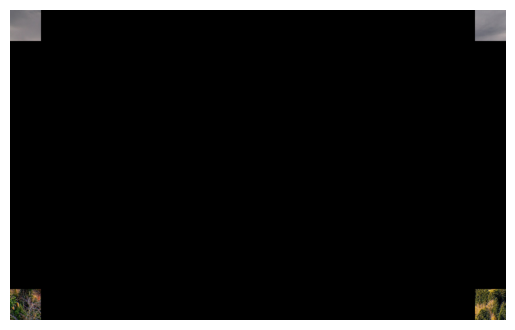

In [ ]:
plt.imshow(base_img)
plt.axis('off')
plt.show()



In [ ]:
def puzzle_solver():
    flag = [False] * len(patches) #Arranged patches
    rows, cols = 10, 16
    img_width, img_height = 1920, 1200
    patch_width, patch_height = img_width // cols, img_height // rows
    final_img = base_img.copy()
    file_path = os.path.join(folder_path, "Corner_1_1.tif")
    img = np.array(Image.open(file_path))
    final_img[0:patch_height, 0:patch_width] = img #Place the top left corner in img
    row, col = 0, 1
    start_row = img #Save the first patch of the rows
    while row < rows: # Arrange the rows
        if row == rows - 1:  #Handling the last row
            file_path = os.path.join(folder_path, "Corner_10_1.tif")
            img = np.array(Image.open(file_path))
            start_row = img #Place the first patch of the rows in img
            final_img[row*patch_height:(row+1)*patch_height, 0:patch_width] = img
            col = 1
        while col < cols: #Arrange the columns
            if (row == 0 and col == cols - 1) or (row == rows - 1 and col == cols - 1): # the top left corner and bottom right corner are Arranged patches
                break
            right_edge = img[:, -1, :]
            #Grab the top edge in the same column (if there is a top row)
            if row > 0:
                above_patch = final_img[(row - 1)*patch_height: row*patch_height,col*patch_width: (col+1)*patch_width]
                top_edge_ref = above_patch[-1, :, :]
            else:
                top_edge_ref = None
            min_diff = float('inf') #The difference between arranged and not arranged patches
            best_patch_idx = -1
            for idx, patch in enumerate(patches):
                if flag[idx]: #Duplicate patches are not selected.
                    continue
                #Separating the top and left border of the arranged patch
                left_edge = patch[:, 0, :]
                top_edge = patch[0, :, :]
                # Calculation of the difference of the boundaries
                horizontal_diff = np.sum(np.abs(right_edge.astype(int) - left_edge.astype(int)))
                if top_edge_ref is not None:
                    vertical_diff = np.sum(np.abs(top_edge_ref.astype(int) - top_edge.astype(int)))
                else:
                    vertical_diff = 0
                diff = horizontal_diff + vertical_diff
                if diff < min_diff: #Find the smallest difference
                    min_diff = diff
                    best_patch_idx = idx
            patch = patches[best_patch_idx]
            final_img[row*patch_height:(row+1)*patch_height,col*patch_width:(col+1)*patch_width] = patch #Placing the appropriate patch in the final image
            img = patches[best_patch_idx] #placing new patch in img
            flag[best_patch_idx] = True # Mark as used
            col += 1
        row += 1
        if row < rows - 1:
            col = 0
            bottom_edge = start_row[-1, :, :]
            min_diff = float('inf')
            best_patch_idx = -1
            for idx, patch in enumerate(patches):# search in patches
                if flag[idx]:
                    continue
                top_edge = patch[0, :, :] #Separating the boundary to find the first patch of the row
                diff = np.sum(np.abs(bottom_edge.astype(int) - top_edge.astype(int)))
                if diff < min_diff:
                    min_diff = diff
                    best_patch_idx = idx
            patch = patches[best_patch_idx]
            final_img[row*patch_height:(row+1)*patch_height, 0:patch_width] = patch
            img = patches[best_patch_idx]
            flag[best_patch_idx] = True
            col = 1
            start_row = img
    plt.imshow(final_img)
    plt.axis('off')
    plt.show()

    return final_img


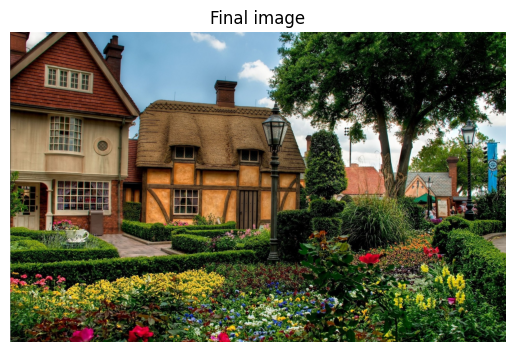

In [ ]:
# Test and Save final Image
final_img = puzzle_solver()
Image.fromarray(final_img).save(os.path.join(folder_path, "final.tif"))



In [ ]:
# Now it's time to find what's our final image good base on original image

# This properties are determined according to the dataset:
rows, cols = 5, 8
img_width, img_height = 1920, 1200
patch_width, patch_height = img_width // cols, img_height // rows

def accuracy_block_base(original_img, final_img, rows, cols):
    correct_blocks = 0
    total_blocks = rows * cols
    for row in range(rows):
        for col in range(cols):
            patch = final_img[row*patch_height:(row+1)*patch_height, col*patch_width:(col+1)*patch_width]
            original_patch = original_img[row*patch_height:(row+1)*patch_height, col*patch_width:(col+1)*patch_width]

            if np.array_equal(patch, original_patch):
                correct_blocks += 1

    return 100 * correct_blocks / total_blocks

original_img = np.array(Image.open(os.path.join(folder_path, "Original.tif")))
accuracy= accuracy_block_base(original_img, final_img, rows, cols)
print(f"Accuracy: {accuracy:.2f}%")



Accuracy: 100.00%


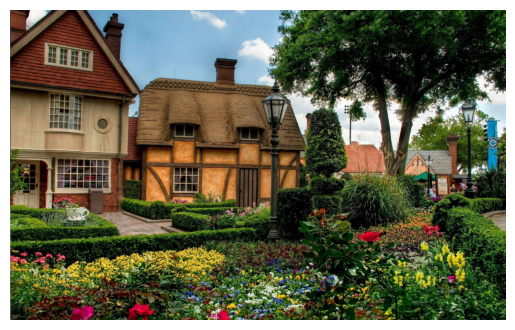

In [ ]:
# show final_img - You can make animation for it while solving puzzle. That's fun!
plt.imshow(final_img)
plt.axis('off')
plt.show()

